
1. Dataset: Use a dataset from:

    seaborn (e.g., tips, diamonds, or titanic)
    OR download a CSV from [Kaggle Datasets](https://www.kaggle.com/datasets) or [UCI ML Repository](https://archive.ics.uci.edu/)

2. Load and Explore:

    Use pandas and matplotlib or seaborn
    Check for:

      Missing values
      Data types
      Basic stats

3. Visual EDA:

    Create 2 meaningful visualizations (e.g., distribution, correlation heatmap, boxplot by category)

4. Feature Engineering:

    Create 2 new features (Examples):

      From date/time (e.g., extract weekday from datetime)
      Binned version of continuous variable (e.g., bin ages into categories)
      Combination feature (e.g., total\_bill per person in tips dataset)

5. Save Your Output:

    Export the modified DataFrame to a new .csv file (optional but good practice)
    

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=sns.load_dataset("tips")
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [4]:
print(df.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [5]:
print(df.describe())
# df.sort_values('tip')


       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


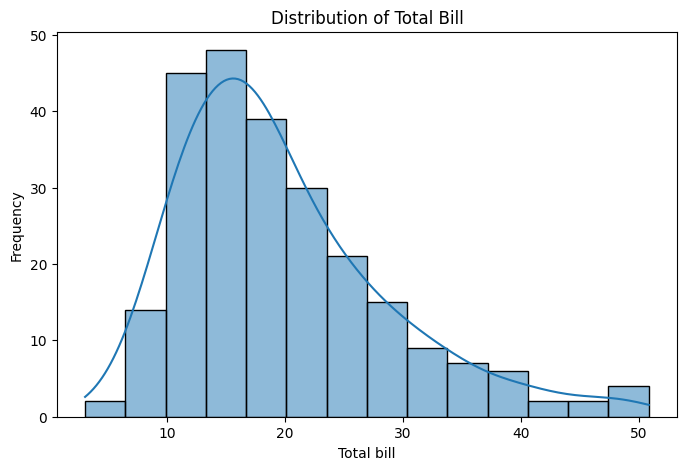

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["total_bill"],kde=True)
plt.title("Distribution of Total Bill")
plt.xlabel("Total bill")
plt.ylabel("Frequency")
plt.show()

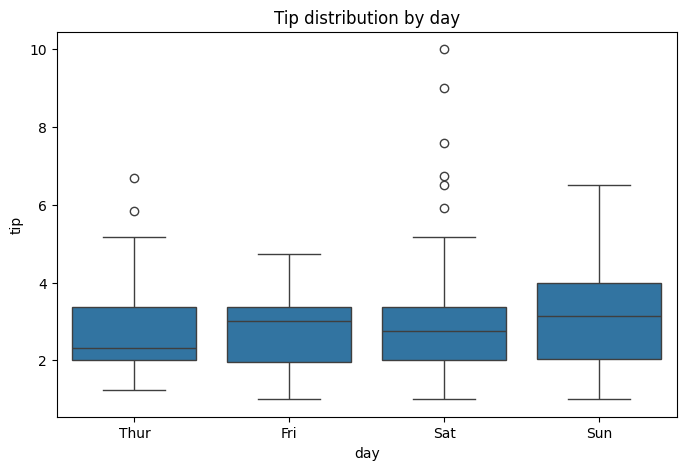

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='day',y='tip',data=df)
plt.title("Tip distribution by day")
plt.show()

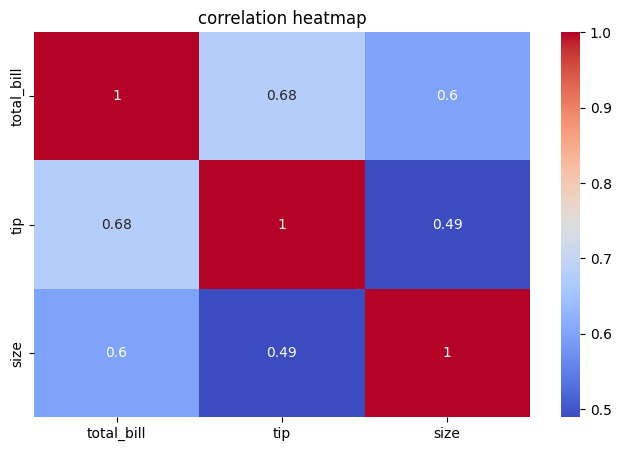

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

In [9]:
df['tip_prct']=(df['tip']/df['total_bill'])*100
print(df)

     total_bill   tip     sex smoker   day    time  size   tip_prct
0         16.99  1.01  Female     No   Sun  Dinner     2   5.944673
1         10.34  1.66    Male     No   Sun  Dinner     3  16.054159
2         21.01  3.50    Male     No   Sun  Dinner     3  16.658734
3         23.68  3.31    Male     No   Sun  Dinner     2  13.978041
4         24.59  3.61  Female     No   Sun  Dinner     4  14.680765
..          ...   ...     ...    ...   ...     ...   ...        ...
239       29.03  5.92    Male     No   Sat  Dinner     3  20.392697
240       27.18  2.00  Female    Yes   Sat  Dinner     2   7.358352
241       22.67  2.00    Male    Yes   Sat  Dinner     2   8.822232
242       17.82  1.75    Male     No   Sat  Dinner     2   9.820426
243       18.78  3.00  Female     No  Thur  Dinner     2  15.974441

[244 rows x 8 columns]


In [10]:
df['bill_bin']=pd.cut(df['total_bill'],bins=[0,10,20,40,60],labels=['Low', 'Medium', 'High', 'Very High'])
print(df)

     total_bill   tip     sex smoker   day    time  size   tip_prct bill_bin
0         16.99  1.01  Female     No   Sun  Dinner     2   5.944673   Medium
1         10.34  1.66    Male     No   Sun  Dinner     3  16.054159   Medium
2         21.01  3.50    Male     No   Sun  Dinner     3  16.658734     High
3         23.68  3.31    Male     No   Sun  Dinner     2  13.978041     High
4         24.59  3.61  Female     No   Sun  Dinner     4  14.680765     High
..          ...   ...     ...    ...   ...     ...   ...        ...      ...
239       29.03  5.92    Male     No   Sat  Dinner     3  20.392697     High
240       27.18  2.00  Female    Yes   Sat  Dinner     2   7.358352     High
241       22.67  2.00    Male    Yes   Sat  Dinner     2   8.822232     High
242       17.82  1.75    Male     No   Sat  Dinner     2   9.820426   Medium
243       18.78  3.00  Female     No  Thur  Dinner     2  15.974441   Medium

[244 rows x 9 columns]


In [11]:
df['date']=pd.date_range(start='2023-01-01',periods=len(df),freq='D')
df['Weekday']=df['date'].dt.day_name()
print(df)

     total_bill   tip     sex smoker   day    time  size   tip_prct bill_bin  \
0         16.99  1.01  Female     No   Sun  Dinner     2   5.944673   Medium   
1         10.34  1.66    Male     No   Sun  Dinner     3  16.054159   Medium   
2         21.01  3.50    Male     No   Sun  Dinner     3  16.658734     High   
3         23.68  3.31    Male     No   Sun  Dinner     2  13.978041     High   
4         24.59  3.61  Female     No   Sun  Dinner     4  14.680765     High   
..          ...   ...     ...    ...   ...     ...   ...        ...      ...   
239       29.03  5.92    Male     No   Sat  Dinner     3  20.392697     High   
240       27.18  2.00  Female    Yes   Sat  Dinner     2   7.358352     High   
241       22.67  2.00    Male    Yes   Sat  Dinner     2   8.822232     High   
242       17.82  1.75    Male     No   Sat  Dinner     2   9.820426   Medium   
243       18.78  3.00  Female     No  Thur  Dinner     2  15.974441   Medium   

          date    Weekday  
0   2023-01

In [12]:
df.to_csv('tips_modified.csv',index=False)

Steps:

1. Generate Synthetic Data (NumPy)
	•	Create an array of 10 student names.
	•	Generate random marks for 3 subjects (Math, Science, English) using np.random.randint().

2. Create a DataFrame (Pandas)
	•	Convert the data into a DataFrame.
	•	Add a Total and Average column.
	•	Sort the DataFrame by Total in descending order.

3. Compute Basic Stats
	•	Display the student with the highest average.
	•	Count how many students scored above 75 in Math.

4. Visualization (Matplotlib)
	•	Create a bar chart showing total marks for each student.
	•	Create a histogram of Science scores.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

students_name=np.array(["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Hannah", "Ian", "Julia"])
np.random.seed(45)
math_score=np.random.randint(50,100,size=10)
science_score=np.random.randint(50,100,size=10)
english_score=np.random.randint(50,100,size=10)

df=pd.DataFrame({
    "Students":students_name,
    "Math":math_score,
    "Science":science_score,
    "English":english_score
})

df["Total"]=df[["Math","Science","English"]].sum(axis=1)
df["Average"]=df["Total"]/3
df=df.sort_values(by="Total",ascending=False).reset_index(drop=True)
print(df)

  Students  Math  Science  English  Total    Average
0    David    82       96       80    258  86.000000
1    Grace    85       84       86    255  85.000000
2    Frank    71       62       92    225  75.000000
3  Charlie    53       73       96    222  74.000000
4    Alice    61       64       88    213  71.000000
5   Hannah    54       74       81    209  69.666667
6    Julia    51       67       86    204  68.000000
7      Eva    81       58       64    203  67.666667
8      Ian    65       62       72    199  66.333333
9      Bob    80       58       54    192  64.000000


In [14]:
top_student=df.loc[df["Average"].idxmax()]
print("\nTop Student Based on Average:\n", top_student)

count_math_above_75=(df["Math"]>75).sum()
print(f"\nNumber of students scoring above 75 in Math: {count_math_above_75}")


Top Student Based on Average:
 Students    David
Math           82
Science        96
English        80
Total         258
Average      86.0
Name: 0, dtype: object

Number of students scoring above 75 in Math: 4


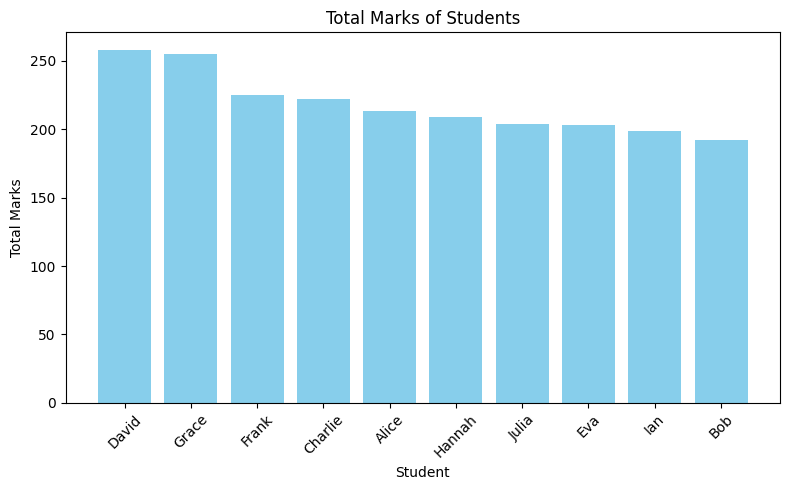

In [15]:
plt.figure(figsize=(8,5))
plt.bar(df["Students"],df["Total"],color='skyblue')
plt.title("Total Marks of Students")
plt.xlabel("Student")
plt.ylabel("Total Marks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

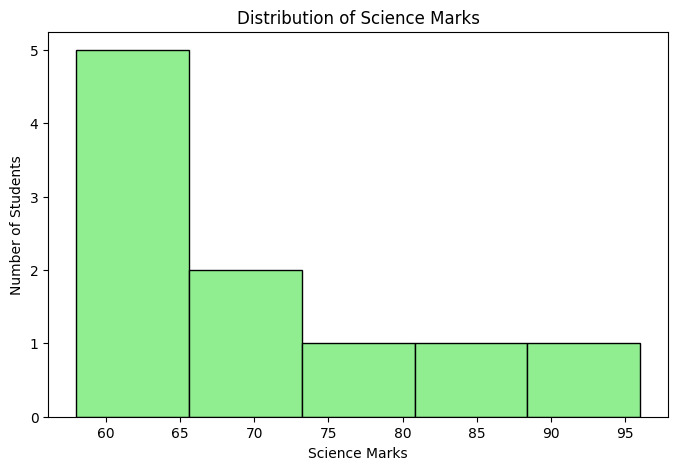

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df["Science"],bins=5,color="lightgreen",edgecolor='black')
plt.title("Distribution of Science Marks")
plt.xlabel("Science Marks")
plt.ylabel("Number of Students")
plt.show()

In [17]:
import pandas as pd
data={
        "calories":[421,344,756],
    "durataion":[40,20,90]
}

df=pd.DataFrame(data)
print(df)


   calories  durataion
0       421         40
1       344         20
2       756         90


In [18]:


print(df.loc[[0,2]])

   calories  durataion
0       421         40
2       756         90


In [19]:
import numpy as np
data= [[[1,3],[2,3]],[[1,2],[6,7]]]
x=np.array(data,ndmin=5)
print(x)

[[[[[1 3]
    [2 3]]

   [[1 2]
    [6 7]]]]]


In [20]:
arr=np.array([[1,2,3],[9,4,6]])
print(arr[1,:3])

[9 4 6]


In [21]:

x=np.full((3,3),40)
x

array([[40, 40, 40],
       [40, 40, 40],
       [40, 40, 40]])

In [22]:
A=np.array([[1,2],[3,4]])
B=np.array([1,2])
# A+B
x=np.linalg.solve(A,B)
print(x)


[0.  0.5]


In [23]:
arr11=np.arange(start=0,stop=25).reshape(5,5)
arr11[arr11>10]=25
arr11

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 25, 25, 25, 25],
       [25, 25, 25, 25, 25],
       [25, 25, 25, 25, 25]])

In [24]:
arr=np.array([[1,2,13],[4,1,3]])
arr


array([[ 1,  2, 13],
       [ 4,  1,  3]])

In [25]:
print(np.max(arr,axis=1))

[13  4]


🧮 NumPy Questions (Numerical Computing)
📌 Basics
Create a 1D, 2D, and 3D NumPy array.

Generate an array of 10 zeros, ones, and random numbers.

Create a NumPy array of even numbers between 10 and 50.

Create an array of 100 random numbers between 0 and 1.

Reshape a 1D array into 5x4 matrix.

🔁 Indexing, Slicing, and Filtering
Slice the first 3 rows and 2 columns of a 2D array.

Find all elements in an array greater than 50.

Replace all odd numbers in an array with -1.

⚙️ Operations
Add, subtract, multiply two NumPy arrays.

Get the mean, median, and standard deviation of an array.

Normalize an array (values between 0 and 1).

Find unique elements and their counts in an array.

💡 Advanced
Create an identity matrix of size 4.

Sort a 2D array by its second column.

Flatten a multi-dimensional array.

🐼 Pandas Questions (Data Analysis)
📄 DataFrame Creation & Basic Exploration
Create a DataFrame from a dictionary.

Read a CSV file into a DataFrame.

Display first 5 and last 3 rows.

Get data types and summary statistics (info(), describe()).

📌 Indexing & Filtering
Select a specific column and multiple columns.

Filter rows where column 'Age' > 30.

Use .loc[] and .iloc[] for row/column selection.

Set a column as the index.

🔄 Data Cleaning
Check and fill missing values in a DataFrame.

Drop rows with any missing values.

Rename columns.

Convert data type of a column (e.g., string to int).

⚙️ Operations & Transformations
Add a new column as sum of two others.

Apply a function to a column using .apply().

Sort a DataFrame by one or more columns.

Use .groupby() to find average salary by department.

📊 Aggregation & Merging
Count number of unique values in a column.

Merge two DataFrames on a common key.

Concatenate two DataFrames vertically.

Pivot table showing average price by product and region.

🧪 Practical Scenarios
Load a CSV of sales data and:

Calculate total revenue per region.

Find top 3 products by total units sold.

Plot monthly sales using matplotlib/seaborn.


📦 Bonus: Combo (NumPy + Pandas)
Convert a NumPy array to a Pandas DataFrame.

Use NumPy to create data and Pandas to analyze it.

Compare performance of pandas.Series vs numpy.array for arithmetic.



In [26]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [27]:
df=sns.load_dataset('diamonds')
print(df.head(10))


   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


In [28]:
df.dtypes


carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [29]:
df.shape


(53940, 10)

In [30]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [31]:
df[df['price']>15000]

,carat,cut,color,clarity,depth,table,price,x,y,z
25885,1.54,Premium,E,VS2,62.3,58.0,15002,7.31,7.39,4.58
25886,1.19,Ideal,F,VVS1,61.5,55.0,15005,6.82,6.84,4.20
25887,2.10,Premium,I,SI1,61.5,57.0,15007,8.25,8.21,5.06
25888,1.69,Ideal,D,SI1,60.8,57.0,15011,7.69,7.71,4.68
25889,1.50,Very Good,G,VVS2,62.9,56.0,15013,7.22,7.32,4.57
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [32]:
df[(df['cut']=='Ideal')&(df['color']=='E')] #filtering on two condition


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
82,0.26,Ideal,E,VVS2,62.9,58.0,554,4.02,4.06,2.54
90,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
109,0.59,Ideal,E,VVS2,62.0,55.0,2761,5.38,5.43,3.35
111,0.74,Ideal,E,SI2,62.2,56.0,2761,5.80,5.84,3.62
...,...,...,...,...,...,...,...,...,...,...
53876,0.70,Ideal,E,SI1,61.7,55.0,2745,5.71,5.74,3.53
53878,0.51,Ideal,E,VVS1,61.9,54.0,2745,5.17,5.11,3.18
53891,0.56,Ideal,E,VVS1,62.1,56.0,2750,5.28,5.29,3.28
53915,0.77,Ideal,E,SI2,62.1,56.0,2753,5.84,5.86,3.63


In [33]:
df[(df['carat']>=0.5)&(df['carat']<=1.0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
90,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
92,0.70,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50
93,0.71,Very Good,E,VS2,62.4,57.0,2759,5.68,5.73,3.56
94,0.78,Very Good,G,SI2,63.8,56.0,2759,5.81,5.85,3.72
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [34]:
df.groupby('cut')['price'].mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_17664\3177101055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cut')['price'].mean()


cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64

In [35]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [36]:
df.groupby('clarity')['price'].max()

C:\Users\USER\AppData\Local\Temp\ipykernel_17664\2627360554.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('clarity')['price'].max()


clarity
IF      18806
VVS1    18777
VVS2    18768
VS1     18795
VS2     18823
SI1     18818
SI2     18804
I1      18531
Name: price, dtype: int64

In [37]:
df['volume']=df['x']*df['y']*df['z']
df['price per carat']=df['price']/df['carat']
df['cut']=df['cut'].replace('Fair','Poor')
df.head(20)

C:\Users\USER\AppData\Local\Temp\ipykernel_17664\2238949681.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['cut']=df['cut'].replace('Fair','Poor')


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price per carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,1080.645161
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952,1400.000000
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870,1400.000000
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081,1296.153846
8,0.22,Poor,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214,1531.818182
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,38.718000,1469.565217


In [38]:
x=np.median(df['price'])
print(x)

2401.0


In [39]:
df[df['depth']>np.mean(df['depth'])]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price per carat
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,1080.645161
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952,1400.000000
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870,1400.000000
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081,1296.153846
...,...,...,...,...,...,...,...,...,...,...,...,...
53926,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54,115.822782,3881.690141
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,116.721246,3829.166667
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175,3829.166667
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728,3938.571429


In [40]:
df['carat_normalized']=(df['carat']-df['carat'].min())/(df['carat'].max()-df['carat'].min())
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price per carat,carat_normalized
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1417.391304,0.006237
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1552.380952,0.002079
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1421.739130,0.006237
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,1151.724138,0.018711
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,1080.645161,0.022869


In [41]:
df.isnull().sum()

carat               0
cut                 0
color               0
clarity             0
depth               0
table               0
price               0
x                   0
y                   0
z                   0
volume              0
price per carat     0
carat_normalized    0
dtype: int64

In [42]:
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]
(df[['x', 'y', 'z']] == 0).sum()



x    0
y    0
z    0
dtype: int64

In [43]:
df.sort_values('price',ascending=False).head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price per carat,carat_normalized
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,371.494200,8219.650655,0.434511
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,317.333520,9409.000000,0.374220
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,249.029352,12454.304636,0.272349
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,340.663260,9084.057971,0.388773
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,318.636000,9401.500000,0.374220


In [44]:
df['Price_rank']=df['price'].rank(ascending=False)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price per carat,carat_normalized,Price_rank
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1417.391304,0.006237,53919.5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1552.380952,0.002079,53919.5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1421.739130,0.006237,53918.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,1151.724138,0.018711,53917.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,1080.645161,0.022869,53916.0


In [45]:
df.iloc[0:2]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price per carat,carat_normalized,Price_rank
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1417.391304,0.006237,53919.5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1552.380952,0.002079,53919.5


In [46]:
df.loc[0:2]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price per carat,carat_normalized,Price_rank
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1417.391304,0.006237,53919.5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1552.380952,0.002079,53919.5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1421.739130,0.006237,53918.0


<function matplotlib.pyplot.show(close=None, block=None)>

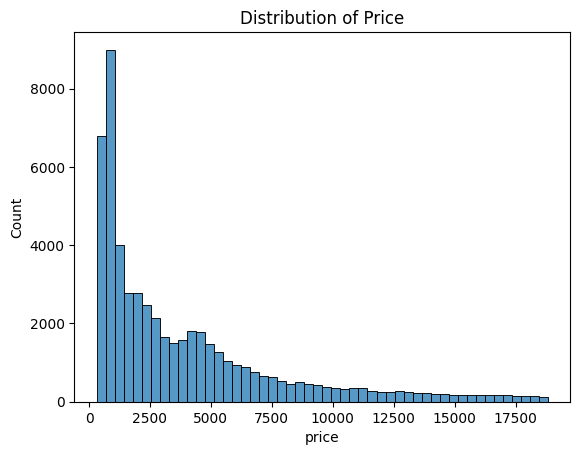

In [48]:
sns.histplot(df['price'],bins=50)
plt.title("Distribution of Price")
plt.show


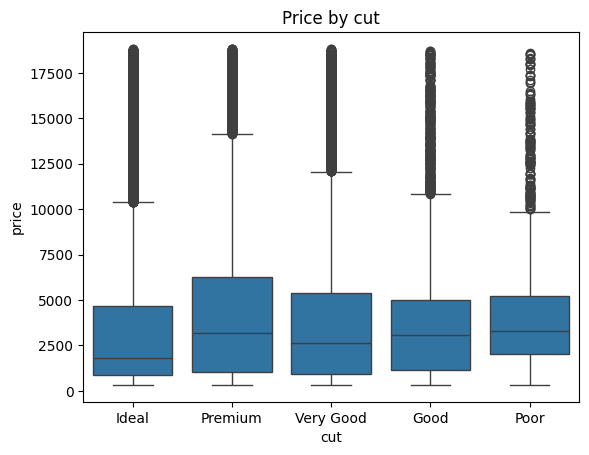

In [49]:
sns.boxplot(x='cut',y='price',data=df)
plt.title("Price by cut")
plt.show()


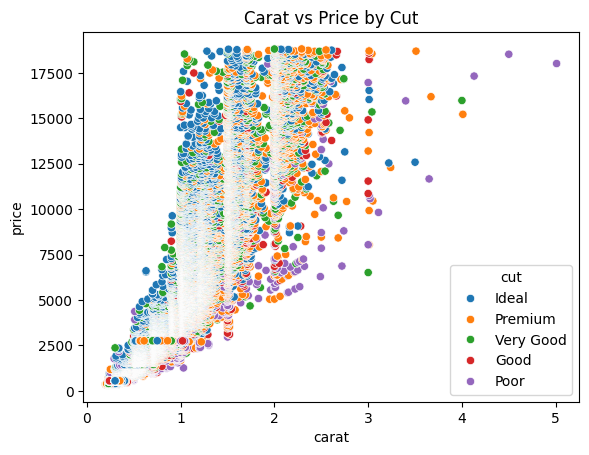

In [51]:
sns.scatterplot(x='carat',y='price',data=df,hue='cut')
plt.title("Carat vs Price by Cut")
plt.show()


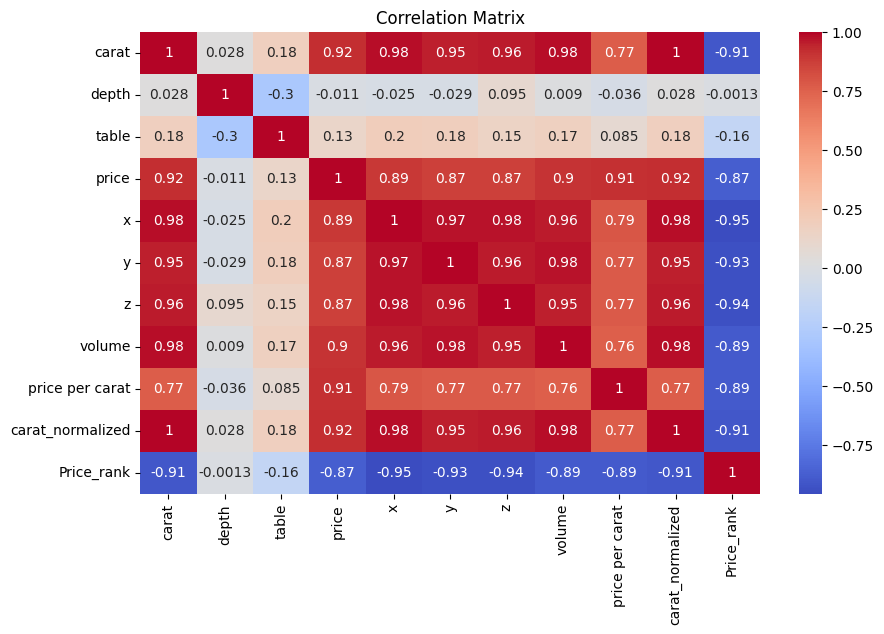

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

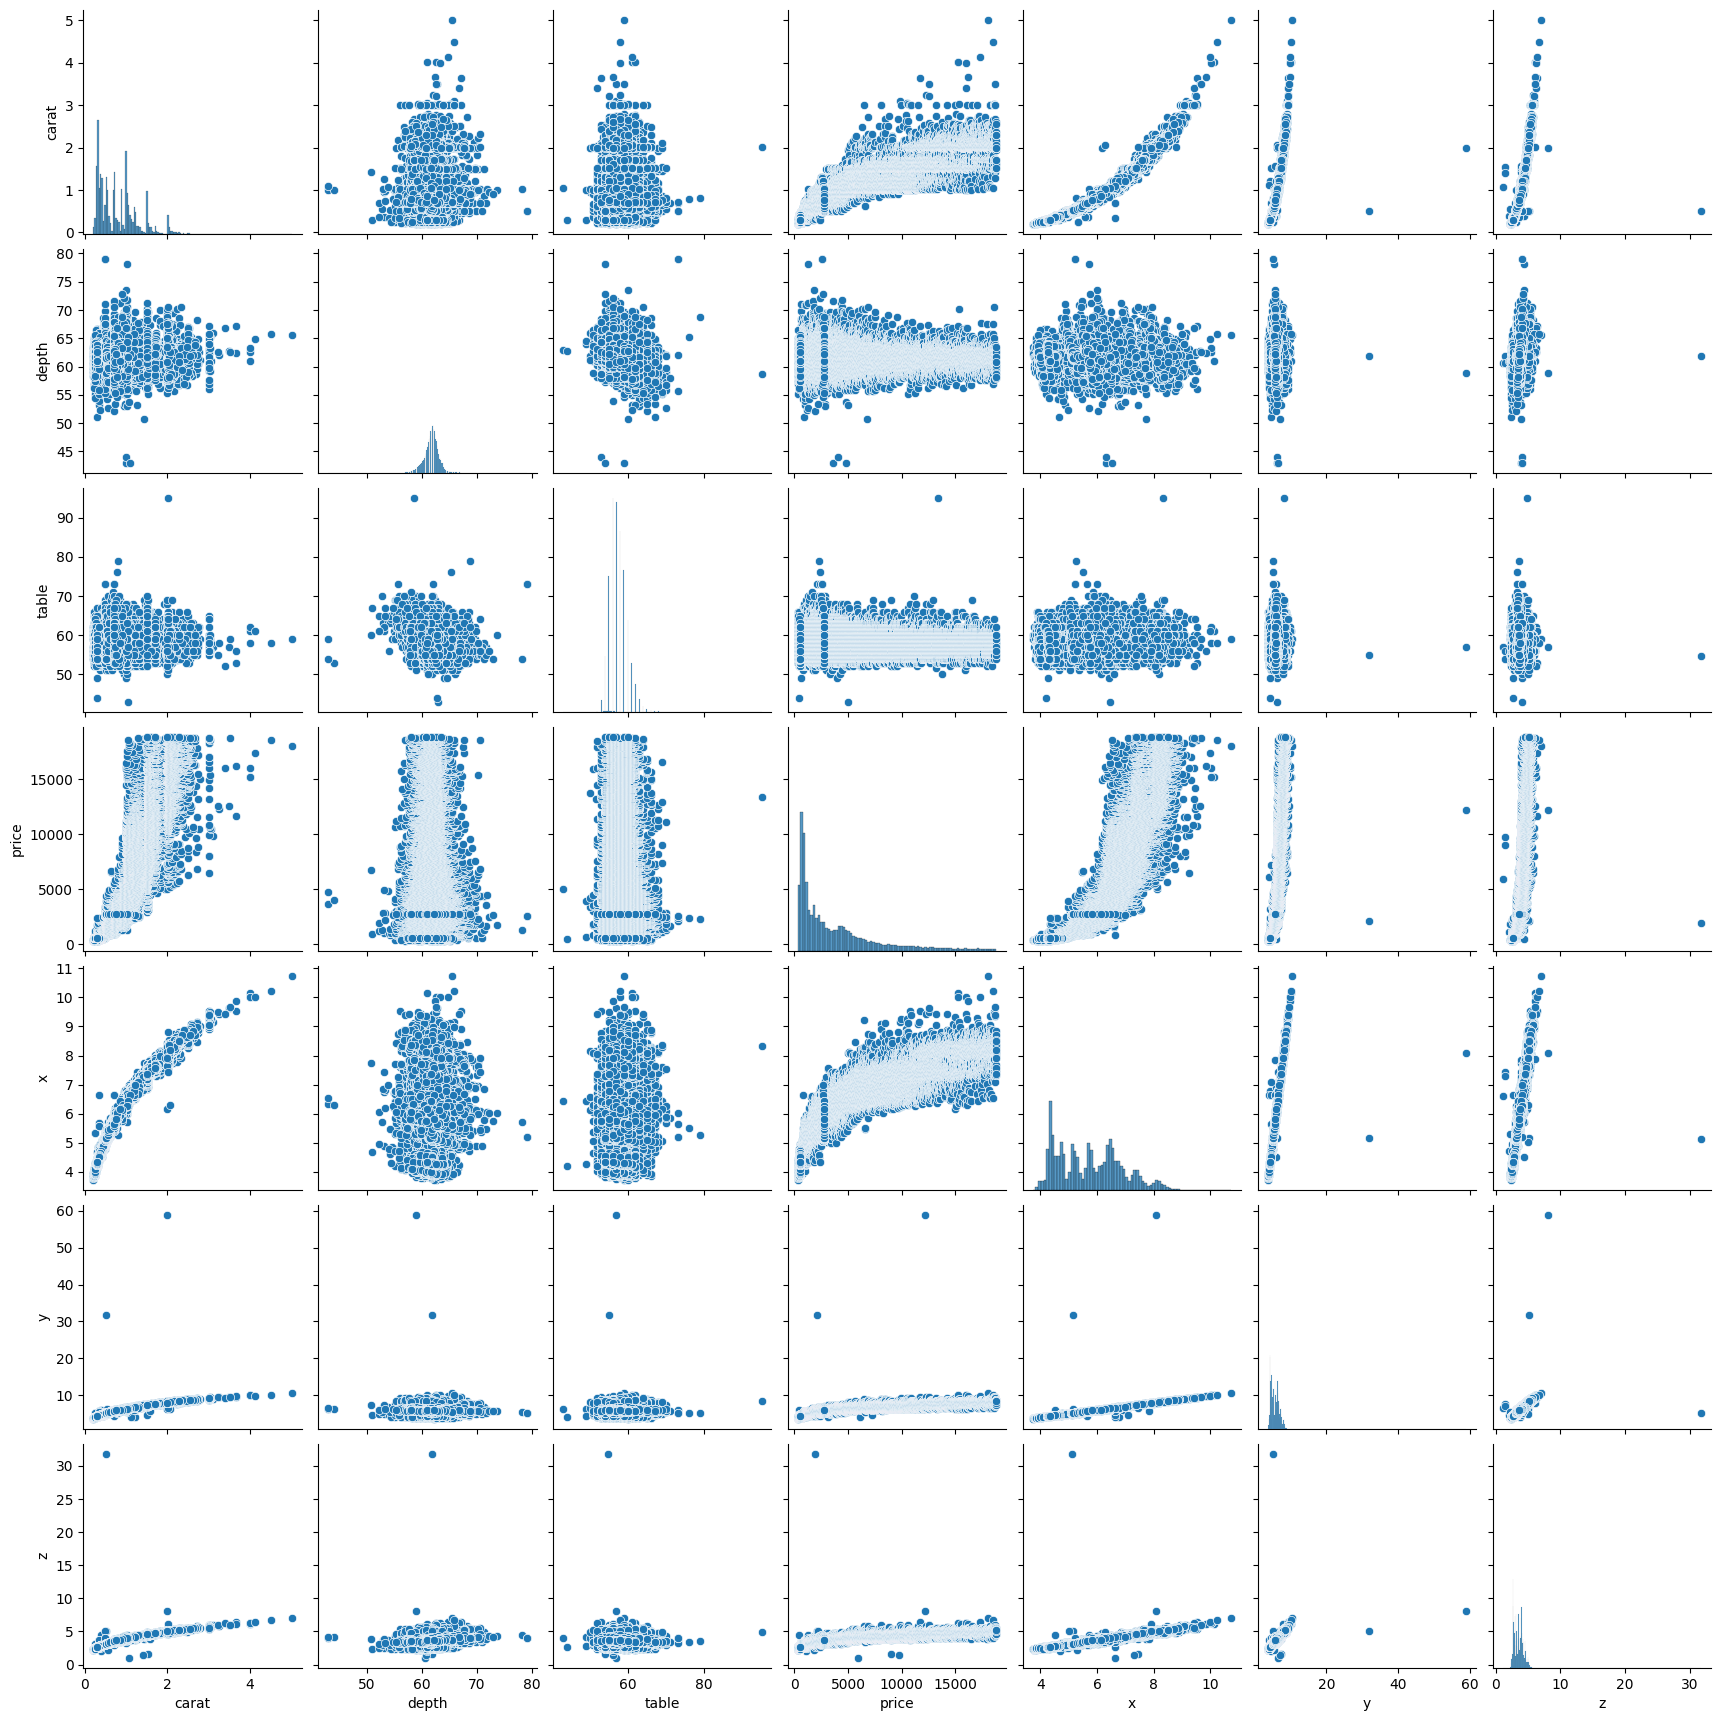

In [53]:
sns.pairplot(df[['carat','depth','table','price','x','y','z']])
plt.show()

1. Simulate Sales Data using NumPy:
   - Create arrays for 100 sales transactions:
     - product_ids: Random integers from 1001 to 1010
     - quantities: Random integers between 1 and 5
     - prices: Random floats between 10 and 100 (rounded to 2 decimals)
     - dates: 100 random dates between Jan 1 and Jan 10, 2025

2. Create a DataFrame using Pandas:
   - Combine the arrays into a DataFrame called sales_df with columns:
     - ProductID, Quantity, Price, Date

3. Add Total Sale Column:
   - Create a new column: TotalSale = Quantity * Price

4. Introduce Missing Data:
   - Randomly set 5 Price values to NaN
   - Fill missing prices with the mean price

5. Group and Aggregate:
   - Group by ProductID and calculate:
     - Total quantity sold
     - Total revenue

6. Visualize using Matplotlib:
   - Bar chart: Total revenue per ProductID
   - Histogram: Distribution of TotalSale values
   - (Bonus) Subplot: One subplot with the bar chart, another with the histogram

C:\Users\USER\AppData\Local\Temp\ipykernel_3080\984002435.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df['Price'].fillna(mean_price, inplace=True)


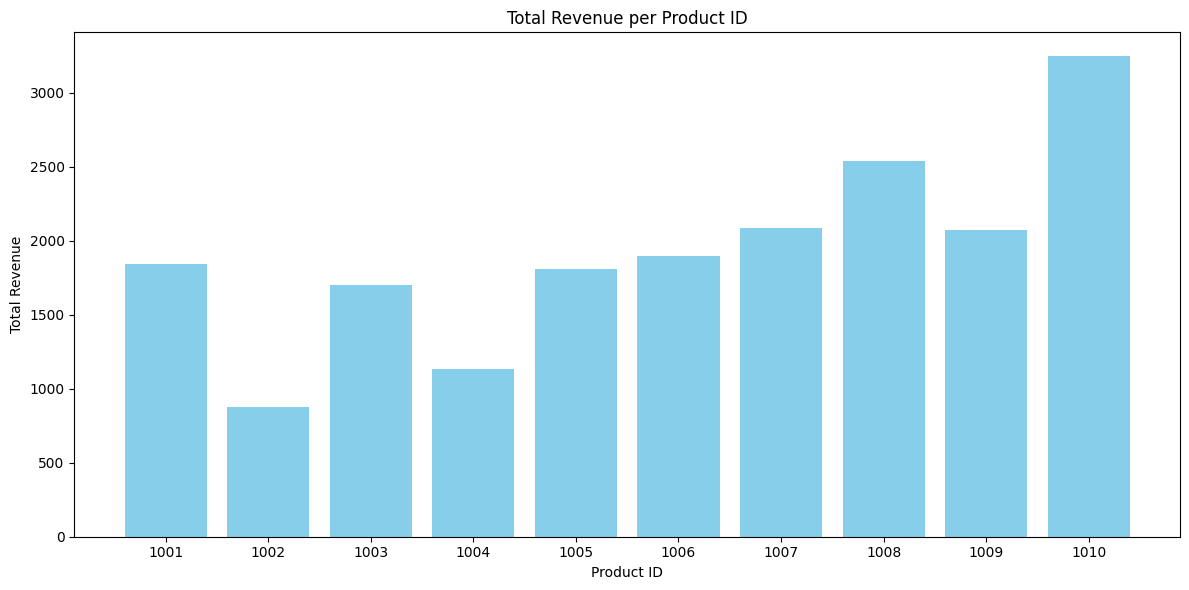

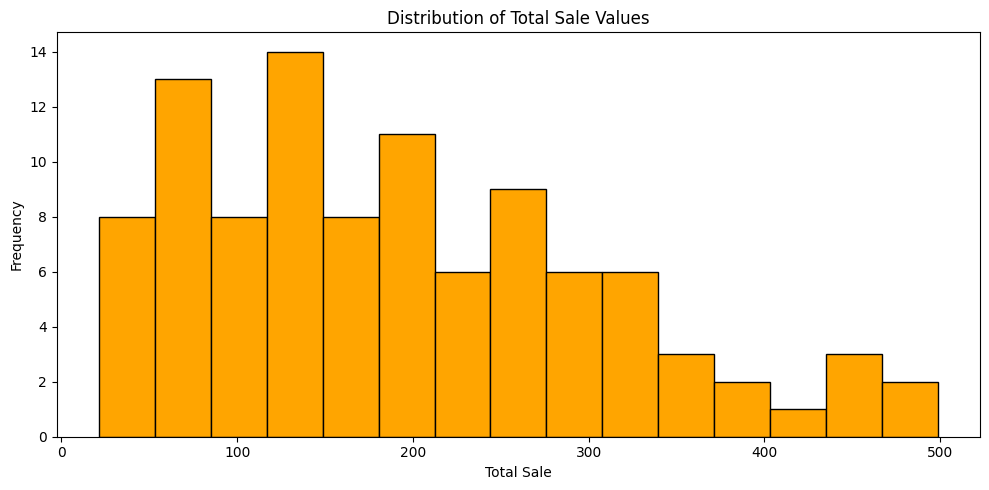

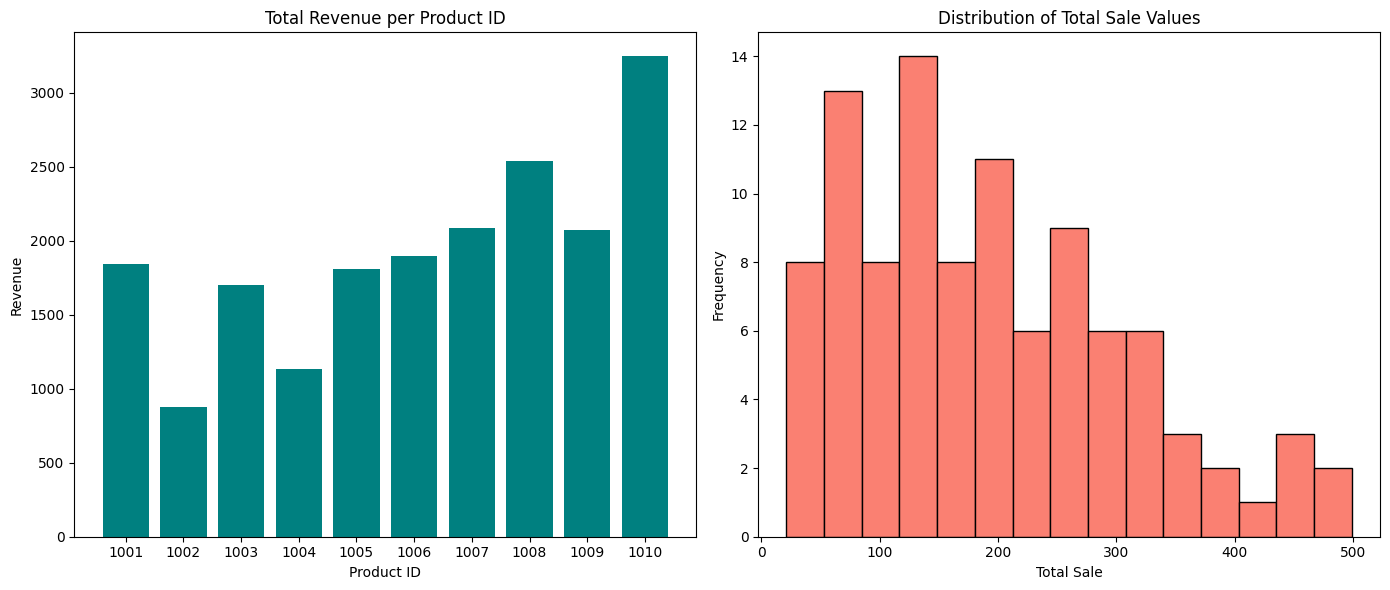

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(45)

product_ids=np.random.randint(1001,1011,size=100)
quantity=np.random.randint(1,6,size=100)
price=np.round(np.random.uniform(10,100,size=100),2)

# start_date = np.datetime64('2025-01-01')
# end_date = np.datetime64('2025-01-10')
# dates = start_date + np.random.randint(0, (end_date - start_date).astype(int) + 1, size=100)

dates=pd.to_datetime(np.random.choice(pd.date_range(start='2025-01-01',end='2025-01-10'),size=100))
sales_df = pd.DataFrame({
    'ProductID': product_ids,
    'Quantity': quantity,
    'Price': price,
    'Date': dates
})


# 3. Add Total Sale Column
sales_df['TotalSale'] = sales_df['Quantity'] * sales_df['Price']

# 4. Introduce Missing Data
nan_indices = np.random.choice(sales_df.index, size=5, replace=False)
sales_df.loc[nan_indices, 'Price'] = np.nan

# Fill missing prices with the mean price
mean_price = sales_df['Price'].mean()
sales_df['Price'].fillna(mean_price, inplace=True)

# Recalculate TotalSale after filling NaNs
sales_df['TotalSale'] = sales_df['Quantity'] * sales_df['Price']

# 5. Group and Aggregate
grouped = sales_df.groupby('ProductID').agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalRevenue=('TotalSale', 'sum')
).reset_index()

# 6. Visualizations

# Bar chart: Total revenue per ProductID
plt.figure(figsize=(12, 6))
plt.bar(grouped['ProductID'].astype(str), grouped['TotalRevenue'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Product ID')
plt.tight_layout()
plt.show()

# Histogram: Distribution of TotalSale values
plt.figure(figsize=(10, 5))
plt.hist(sales_df['TotalSale'], bins=15, color='orange', edgecolor='black')
plt.xlabel('Total Sale')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sale Values')
plt.tight_layout()
plt.show()

# (Bonus) Subplots: Bar chart and Histogram side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Bar chart
axs[0].bar(grouped['ProductID'].astype(str), grouped['TotalRevenue'], color='teal')
axs[0].set_title('Total Revenue per Product ID')
axs[0].set_xlabel('Product ID')
axs[0].set_ylabel('Revenue')

# Subplot 2: Histogram
axs[1].hist(sales_df['TotalSale'], bins=15, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of Total Sale Values')
axs[1].set_xlabel('Total Sale')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
